# Capstone Project - Car accident severity

The objective of this project is to create different machine learning models that can predict different accidents' severity based on a public available data set of historic accident severity. 

## Project Outline
- Problem and a discussion of the background.
- Data source and how it will be used to solve the problem
- Exploratory data analysis 
- Inferential statistical testing 
- Machine learning algorithms
- Results 
- Discussion and observations
- Conclusion

Business Problem


In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [2]:
df = pd.read_csv('Data-Collisions.csv')
df.head()

C:\Users\tege7\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [3]:
df['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [4]:
df['SEVERITYDESC'].value_counts()

Property Damage Only Collision    136485
Injury Collision                   58188
Name: SEVERITYDESC, dtype: int64

In [5]:
df.drop(['X','Y','OBJECTID','INCKEY','COLDETKEY','REPORTNO','STATUS','INTKEY','LOCATION','EXCEPTRSNCODE','EXCEPTRSNDESC'], axis=1, inplace=True)
df.drop(['SEVERITYCODE.1','INCDATE','SDOT_COLCODE','SDOT_COLDESC','PEDROWNOTGRNT','SDOTCOLNUM','SPEEDING','ST_COLCODE'], axis=1, inplace=True)
df.drop(['ST_COLDESC','SEGLANEKEY','CROSSWALKKEY','HITPARKEDCAR'], axis=1, inplace=True)
df.head()

,SEVERITYCODE,ADDRTYPE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDTTM,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND
0,2,Intersection,Injury Collision,Angles,2,0,0,2,3/27/2013 2:54:00 PM,At Intersection (intersection related),NaN,N,Overcast,Wet,Daylight
1,1,Block,Property Damage Only Collision,Sideswipe,2,0,0,2,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),NaN,0,Raining,Wet,Dark - Street Lights On
2,1,Block,Property Damage Only Collision,Parked Car,4,0,0,3,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),NaN,0,Overcast,Dry,Daylight
3,1,Block,Property Damage Only Collision,Other,3,0,0,3,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),NaN,N,Clear,Dry,Daylight
4,2,Intersection,Injury Collision,Angles,2,0,0,2,1/28/2004 8:04:00 AM,At Intersection (intersection related),NaN,0,Raining,Wet,Daylight


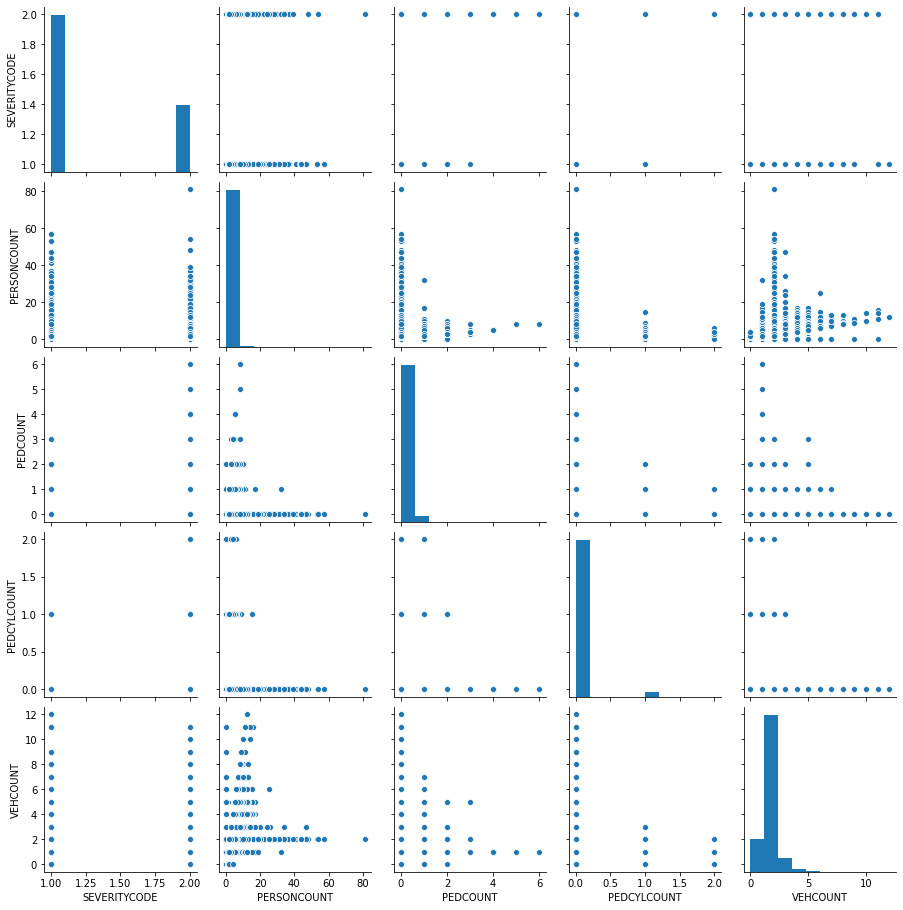

In [6]:
import seaborn as sns
sns.pairplot(df)

In [7]:
df['INCDTTM'] = pd.to_datetime(df['INCDTTM'])
df['month'] = df.INCDTTM.dt.month_name()
df['day'] = df.INCDTTM.dt.day_name()
df['year'] = df.INCDTTM.dt.year
df.head()

,SEVERITYCODE,ADDRTYPE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDTTM,JUNCTIONTYPE,INATTENTIONIND,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,month,day,year
0,2,Intersection,Injury Collision,Angles,2,0,0,2,2013-03-27 14:54:00,At Intersection (intersection related),NaN,N,Overcast,Wet,Daylight,March,Wednesday,2013
1,1,Block,Property Damage Only Collision,Sideswipe,2,0,0,2,2006-12-20 18:55:00,Mid-Block (not related to intersection),NaN,0,Raining,Wet,Dark - Street Lights On,December,Wednesday,2006
2,1,Block,Property Damage Only Collision,Parked Car,4,0,0,3,2004-11-18 10:20:00,Mid-Block (not related to intersection),NaN,0,Overcast,Dry,Daylight,November,Thursday,2004
3,1,Block,Property Damage Only Collision,Other,3,0,0,3,2013-03-29 09:26:00,Mid-Block (not related to intersection),NaN,N,Clear,Dry,Daylight,March,Friday,2013
4,2,Intersection,Injury Collision,Angles,2,0,0,2,2004-01-28 08:04:00,At Intersection (intersection related),NaN,0,Raining,Wet,Daylight,January,Wednesday,2004


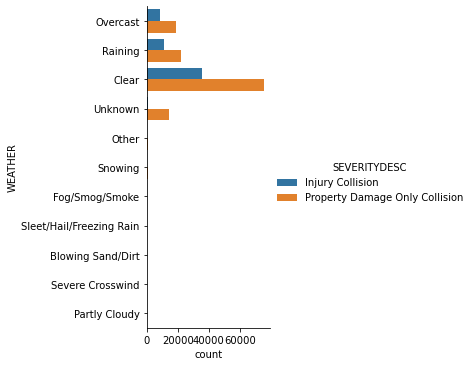

In [8]:
import seaborn as sns
sns.catplot(y='WEATHER',hue='SEVERITYDESC',kind='count',data=df)

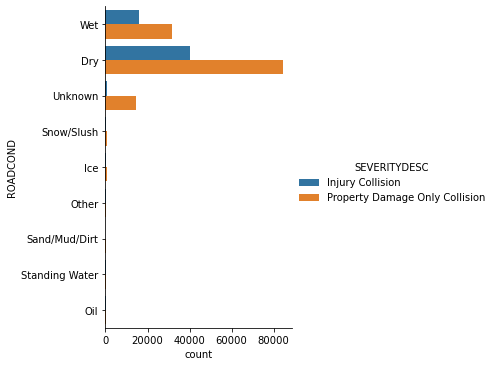

In [9]:
sns.catplot(y='ROADCOND',hue='SEVERITYDESC',kind='count',data=df)

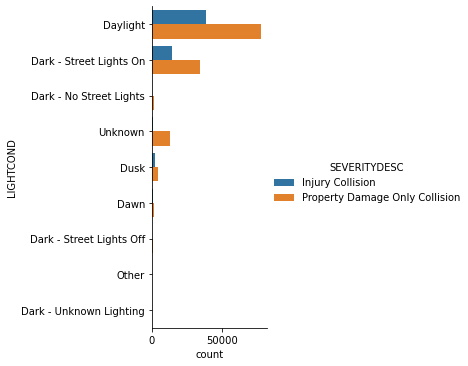

In [10]:
sns.catplot(y='LIGHTCOND',hue='SEVERITYDESC',kind='count',data=df)

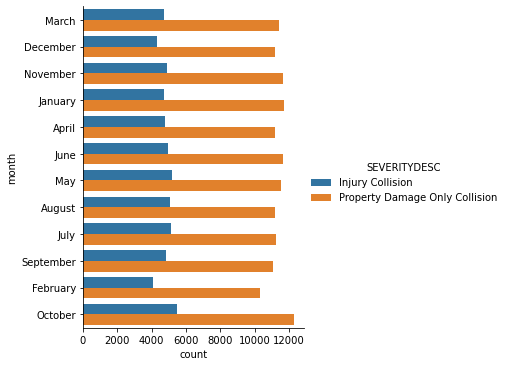

In [11]:
sns.catplot(y='month',hue='SEVERITYDESC',kind='count',data=df)

In [12]:
df.drop(['ADDRTYPE','SEVERITYDESC','COLLISIONTYPE','PEDCYLCOUNT','INCDTTM','JUNCTIONTYPE','INATTENTIONIND','UNDERINFL','day','year'], axis=1, inplace=True)
df.head()

,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,VEHCOUNT,WEATHER,ROADCOND,LIGHTCOND,month
0,2,2,0,2,Overcast,Wet,Daylight,March
1,1,2,0,2,Raining,Wet,Dark - Street Lights On,December
2,1,4,0,3,Overcast,Dry,Daylight,November
3,1,3,0,3,Clear,Dry,Daylight,March
4,2,2,0,2,Raining,Wet,Daylight,January


In [13]:
df['SEVERITYCODE'].value_counts()

1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

In [14]:
df.dropna(inplace=True)

In [15]:
df['SEVERITYCODE'].value_counts()

1    132285
2     57052
Name: SEVERITYCODE, dtype: int64

In [16]:
df1 = pd.get_dummies(df)
my_list=list(df1)

print (my_list)
print (type(my_list))

['SEVERITYCODE', 'PERSONCOUNT', 'PEDCOUNT', 'VEHCOUNT', 'WEATHER_Blowing Sand/Dirt', 'WEATHER_Clear', 'WEATHER_Fog/Smog/Smoke', 'WEATHER_Other', 'WEATHER_Overcast', 'WEATHER_Partly Cloudy', 'WEATHER_Raining', 'WEATHER_Severe Crosswind', 'WEATHER_Sleet/Hail/Freezing Rain', 'WEATHER_Snowing', 'WEATHER_Unknown', 'ROADCOND_Dry', 'ROADCOND_Ice', 'ROADCOND_Oil', 'ROADCOND_Other', 'ROADCOND_Sand/Mud/Dirt', 'ROADCOND_Snow/Slush', 'ROADCOND_Standing Water', 'ROADCOND_Unknown', 'ROADCOND_Wet', 'LIGHTCOND_Dark - No Street Lights', 'LIGHTCOND_Dark - Street Lights Off', 'LIGHTCOND_Dark - Street Lights On', 'LIGHTCOND_Dark - Unknown Lighting', 'LIGHTCOND_Dawn', 'LIGHTCOND_Daylight', 'LIGHTCOND_Dusk', 'LIGHTCOND_Other', 'LIGHTCOND_Unknown', 'month_April', 'month_August', 'month_December', 'month_February', 'month_January', 'month_July', 'month_June', 'month_March', 'month_May', 'month_November', 'month_October', 'month_September']
<class 'list'>


In [17]:
df1['clear'] = df1['WEATHER_Clear'] + df1['WEATHER_Overcast']+ df1[ 'WEATHER_Partly Cloudy']
df1['snow'] = df1[ 'WEATHER_Snowing'] + df1[ 'WEATHER_Sleet/Hail/Freezing Rain']
df1['rain'] = df1[ 'WEATHER_Raining'] + df1[ 'WEATHER_Fog/Smog/Smoke']+ df1['WEATHER_Blowing Sand/Dirt']
unwanted = df1.columns[df1.columns.str.startswith('WEATHER_')]
df1.drop(unwanted, axis=1, inplace=True)
unwanted = df1.columns[df1.columns.str.startswith('ROADCOND_')]
df1.drop(unwanted, axis=1, inplace=True)
df1['winter'] = df1['month_December'] + df1['month_January']+ df1['month_February']
df1['spring'] = df1['month_March'] + df1['month_April']+ df1['month_May']
df1['summer'] = df1['month_June'] + df1['month_July']+ df1['month_August']
df1['fall'] = df1['month_September'] + df1['month_October']+ df1['month_November']
unwanted = df1.columns[df1.columns.str.startswith('month_')]
df1.drop(unwanted, axis=1, inplace=True)
df1['light'] = df1[ 'LIGHTCOND_Daylight'] + df1['LIGHTCOND_Dawn']+ df1['LIGHTCOND_Dusk']
df1['dark'] = df1['LIGHTCOND_Dark - No Street Lights'] + df1['LIGHTCOND_Dark - Street Lights Off']+df1['LIGHTCOND_Dark - Street Lights On']+df1['LIGHTCOND_Dark - Unknown Lighting']
unwanted = df1.columns[df1.columns.str.startswith('LIGHTCOND_')]
df1.drop(unwanted, axis=1, inplace=True)
df1.head()

,SEVERITYCODE,PERSONCOUNT,PEDCOUNT,VEHCOUNT,clear,snow,rain,winter,spring,summer,fall,light,dark
0,2,2,0,2,1,0,0,0,1,0,0,1,0
1,1,2,0,2,0,0,1,1,0,0,0,0,1
2,1,4,0,3,1,0,0,0,0,0,1,1,0
3,1,3,0,3,1,0,0,0,1,0,0,1,0
4,2,2,0,2,0,0,1,1,0,0,0,1,0


In [18]:

my_list=list(df1)

print (my_list)
print (type(my_list))

['SEVERITYCODE', 'PERSONCOUNT', 'PEDCOUNT', 'VEHCOUNT', 'clear', 'snow', 'rain', 'winter', 'spring', 'summer', 'fall', 'light', 'dark']
<class 'list'>


In [19]:

from sklearn.utils import resample
df1_majority = df1[df.SEVERITYCODE==1]
df1_minority = df1[df.SEVERITYCODE==2]
 
# Downsample majority class
df1_majority_downsampled = resample(df1_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=57052,     # to match minority class
                                 random_state=7) # reproducible results
 
# Combine minority class with downsampled majority class
df1d = pd.concat([df1_majority_downsampled, df1_minority])

# Upsample minority class
#df1_minority_upsampled = resample(df1_minority, 
#                                replace=True,     # sample with replacement
#                               n_samples=132285,    # to match majority class
#                                random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
#df1d = pd.concat([df1_majority, df1_minority_upsampled])
 


In [20]:
df1d['SEVERITYCODE'].value_counts()

2    57052
1    57052
Name: SEVERITYCODE, dtype: int64

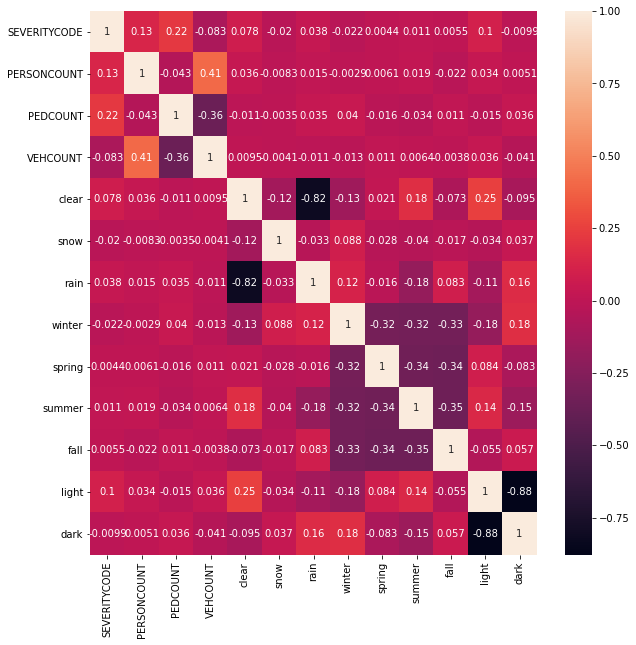

In [21]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(df1d.corr(), annot = True)

In [22]:
#Feature = df1d[['clear', 'snow', 'rain', 'winter', 'spring', 'summer', 'fall', 'light', 'dark']]
Feature = df1d[['clear', 'snow', 'rain', 'light', 'dark']]
X = Feature
X[0:5]

,clear,snow,rain,light,dark
20148,1,0,0,1,0
96778,0,0,0,0,0
23156,1,0,0,1,0
34120,1,0,0,1,0
36765,0,1,0,0,1


In [23]:
y = df1d['SEVERITYCODE'].values
y[0:5]

array([1, 1, 1, 1, 1], dtype=int64)

In [24]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.58216734, -0.06972237, -0.47600611,  0.69139792, -0.60686467],
       [-1.71771917, -0.06972237, -0.47600611, -1.4463451 , -0.60686467],
       [ 0.58216734, -0.06972237, -0.47600611,  0.69139792, -0.60686467],
       [ 0.58216734, -0.06972237, -0.47600611,  0.69139792, -0.60686467],
       [-1.71771917, 14.34259896, -0.47600611, -1.4463451 ,  1.64781384]])

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=7)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)



Train set: (85578, 5) (85578,)
Test set: (28526, 5) (28526,)


In [26]:
# training
k = 7
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train, y_train)
neigh


KNeighborsClassifier(n_neighbors=7)

In [27]:
# predicting
yhat = neigh.predict(X_test)
yhat[0:5]

array([2, 2, 2, 2, 2], dtype=int64)

In [28]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.5549673981630793
Test set Accuracy:  0.5503750964032812


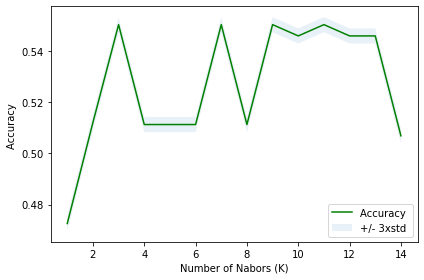

The best accuracy of KNN is  0.5503750964032812 , k= 3
KNN's Accuracy:  0.5503750964032812


In [29]:
Ks = 15
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfusionMx = []
for n in range(1, Ks):
    # train model and predict
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()
print("The best accuracy of KNN is ", mean_acc.max(), ", k=", mean_acc.argmax()+1)
Acc_knn = mean_acc.max()
print("KNN's Accuracy: ", Acc_knn)

In [30]:
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=7)

DTree = DecisionTreeClassifier(criterion="entropy", max_depth = 6)
DTree

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

DTree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

predTree = DTree.predict(X_test)

print (predTree[0:10])
print (y_test[0:10])





[2 2 2 2 2 2 2 2 2 2]
[1 1 2 2 1 1 1 1 1 2]


In [31]:
from sklearn import metrics
import matplotlib.pyplot as plt

Acc_dt = metrics.accuracy_score(y_test, predTree)
print("DecisionTrees's Accuracy: ", Acc_dt)


DecisionTrees's Accuracy:  0.556895463787422


In [32]:
!conda install -c anaconda pydotplus -y

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\tege7\anaconda3

  added / updated specs:
    - pydotplus


The following packages will be SUPERSEDED by a higher-priority channel:

  conda              conda-forge::conda-4.8.5-py38h32f6830~ --> anaconda::conda-4.8.5-py38_0


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done


In [33]:
!conda install -c conda-forge python-graphviz -y

Solving environment: ...working... 
  - anaconda/win-64::ca-certificates-2020.6.24-0, anaconda/win-64::certifi-2020.6.20-py38_0, anaconda/win-64::openssl-1.1.1g-he774522_0
  - anaconda/win-64::ca-certificates-2020.6.24-0, anaconda/win-64::certifi-2020.6.20-py38_0, defaults/win-64::openssl-1.1.1g-he774522_0
  - anaconda/win-64::ca-certificates-2020.6.24-0, anaconda/win-64::openssl-1.1.1g-he774522_0, defaults/win-64::certifi-2020.6.20-py38_0
  - anaconda/win-64::ca-certificates-2020.6.24-0, defaults/win-64::certifi-2020.6.20-py38_0, defaults/win-64::openssl-1.1.1g-he774522_0
  - anaconda/win-64::openssl-1.1.1g-he774522_0, defaults/win-64::ca-certificates-2020.6.24-0, defaults/win-64::certifi-2020.6.20-py38_0
  - defaults/win-64::ca-certificates-2020.6.24-0, defaults/win-64::certifi-2020.6.20-py38_0, defaults/win-64::openssl-1.1.1g-he774522_0
  - anaconda/win-64::certifi-2020.6.20-py38_0, anaconda/win-64::openssl-1.1.1g-he774522_0, defaults/win-64::ca-certificates-2020.6.24-0
  - anaconda

In [34]:
from sklearn import svm

In [35]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=7)

In [36]:
clf = svm.SVC(kernel='rbf')
clf.fit(X_train,y_train) 

SVC()

In [37]:
yhat = clf.predict(X_test)
yhat

array([2, 2, 2, ..., 2, 2, 2], dtype=int64)

In [38]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

              precision    recall  f1-score   support

           1       0.61      0.32      0.42     14319
           2       0.54      0.80      0.64     14207

    accuracy                           0.56     28526
   macro avg       0.57      0.56      0.53     28526
weighted avg       0.58      0.56      0.53     28526



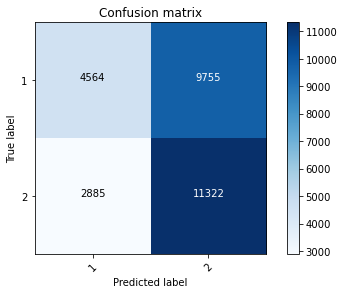

In [39]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
cnf_matrix = confusion_matrix(y_test, yhat, labels=[1,2])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat))
   
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[1,2],normalize= False,  title='Confusion matrix')


In [40]:
from sklearn.metrics import f1_score
F1_svm =f1_score(y_test, yhat, average='weighted')
print("SVM F1 Score: ", F1_svm)

SVM F1 Score:  0.5301108876321696


In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=7)

LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

In [42]:
yhat = LR.predict(X_test)
yhat
yhat_prob = LR.predict_proba(X_test)
yhat_prob

array([[0.46, 0.54],
       [0.46, 0.54],
       [0.46, 0.54],
       ...,
       [0.46, 0.54],
       [0.46, 0.54],
       [0.46, 0.54]])

In [43]:
LL_AC=metrics.accuracy_score(yhat,y_test)
print('The accuracy of the Logistic Regression is', LL_AC)

The accuracy of the Logistic Regression is 0.556895463787422


In [44]:
from sklearn.metrics import log_loss
LL_LR =log_loss(y_test, yhat_prob)
print("Logistic Log Loss score: ", LL_LR)

Logistic Log Loss score:  0.6691064961117598


In [45]:
from sklearn.ensemble import RandomForestClassifier
forest=RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, class_weight=None)

forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=10, n_jobs=1)

In [46]:
forestpredict=forest.predict(X_test)

print (forestpredict[0:10])
print (y_test[0:10])



[2 2 2 2 2 2 2 2 2 2]
[1 1 2 2 1 1 1 1 1 2]


In [47]:
Acc_RF = metrics.accuracy_score(y_test, forestpredict)
print("Random Forest's Accuracy: ", Acc_RF)

Random Forest's Accuracy:  0.556895463787422


In [48]:
print("KNN's Accuracy: ", Acc_knn)
print("DecisionTrees's Accuracy: ", Acc_dt)
print("SVM F1 Score: ", F1_svm)
print('Logistic Regression Accuracy', LL_AC)
print("Random Forest's Accuracy: ", Acc_RF)
print("Logistic Log Loss score: ", LL_LR)

KNN's Accuracy:  0.5503750964032812
DecisionTrees's Accuracy:  0.556895463787422
SVM F1 Score:  0.5301108876321696
Logistic Regression Accuracy 0.556895463787422
Random Forest's Accuracy:  0.556895463787422
Logistic Log Loss score:  0.6691064961117598
